In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection  import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import collections

In [3]:
credit_raw = pd.read_csv("C:/KaggleData/BankChurners.csv")
credit = credit_raw[credit_raw.columns[:-2]]

credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [4]:
credit.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


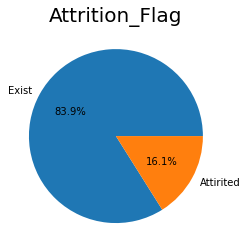

In [5]:
labels = ['Exist','Attirited']
plt.pie(credit['Attrition_Flag'].value_counts(),labels=labels,autopct='%.1f%%')
plt.title("Attrition_Flag",fontsize=20)
plt.show()

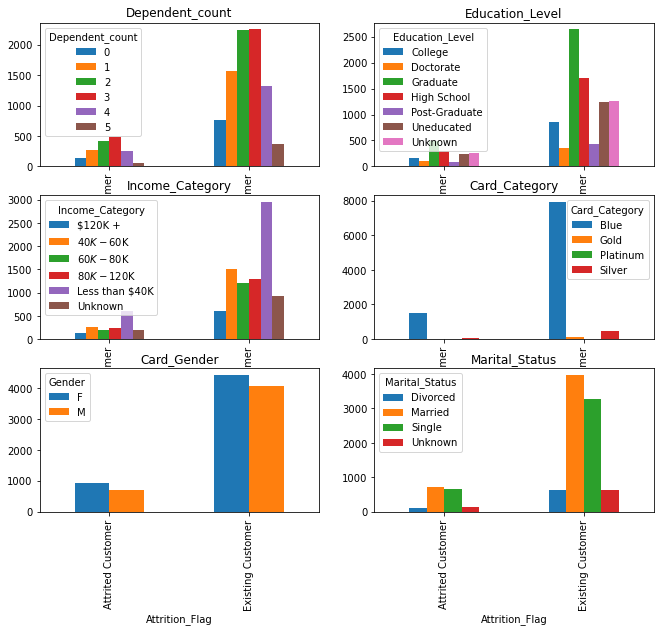

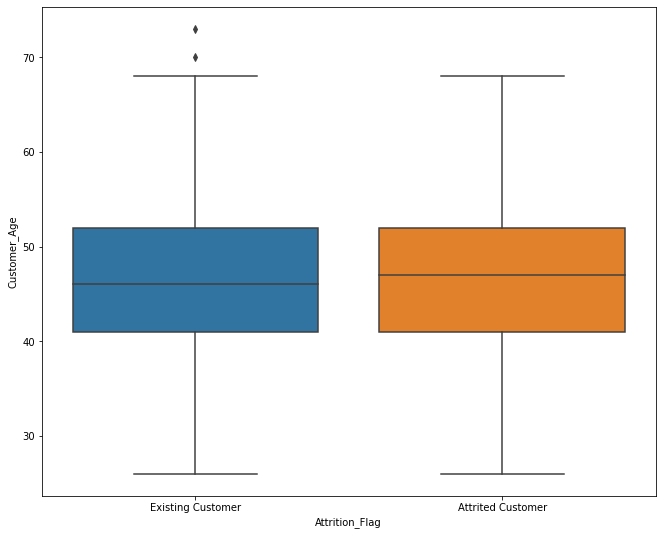

In [8]:
fig, ((ax1, ax2), (ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2)
plt.rcParams['figure.figsize'] = [25,20] 

df1 = pd.crosstab(credit['Attrition_Flag'],credit['Dependent_count'])
df1.plot(kind = 'bar', title = 'Dependent_count',ax=ax1)

df2 = pd.crosstab(credit['Attrition_Flag'],credit['Education_Level'])
df2.plot(kind = 'bar',title = 'Education_Level',ax=ax2)

df3 = pd.crosstab(credit['Attrition_Flag'],credit['Income_Category'])
df3.plot(kind = 'bar',title = 'Income_Category',ax=ax3)

df4 = pd.crosstab(credit['Attrition_Flag'],credit['Card_Category'])
df4.plot(kind = 'bar',title = 'Card_Category',ax=ax4)

df5 = pd.crosstab(credit['Attrition_Flag'],credit['Gender'])
df5.plot(kind = 'bar',title = 'Card_Gender',ax=ax5)

df6 = pd.crosstab(credit['Attrition_Flag'],credit['Marital_Status'])
df6.plot(kind = 'bar',title = 'Marital_Status',ax=ax6)

plt.show()
plt.rcParams['figure.figsize'] = [11,9]
sns.boxplot( data= credit,x='Attrition_Flag', y='Customer_Age')
plt.show()

인구학적 데이터으로는 고객이탈과 상관이 없음. 데이터의 모양이 같으므로 확인 가능. 그렇다면, 어떤 전제조건들로 고객이탈을 예측할 수 있을지 다른 변수들로 확인보겠음.

In [9]:
dummy_att = pd.get_dummies(credit['Attrition_Flag'])
df = credit.iloc[:,9:21]
con_df = df.join(dummy_att)
con_df.head()

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrited Customer,Existing Customer
0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1
1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,1
2,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1
3,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,1
4,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1


NonNuneric data와 종속변수의 상관성을 confusion Matrix로 나타냄

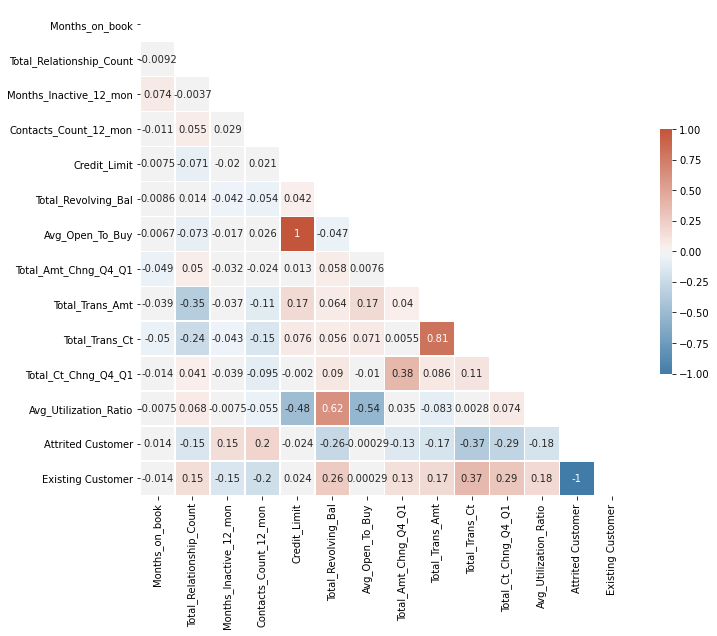

In [10]:
corr=con_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(240, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [11]:
df = credit.iloc[:,9:21]
attrition = credit['Attrition_Flag']
con_df = df.join(attrition)
con_df.head()

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,Existing Customer
1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,Existing Customer
2,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,Existing Customer
3,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,Existing Customer
4,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,Existing Customer


# Modeling(XGBoost, SVM, Random Forest with Random SearchCV)

In [12]:
X = con_df.iloc[:,0:12]
y = con_df.iloc[:,12]


def normal(x) :
    nor = (x - np.min(x)) / (np.max(x) - np.min(x))
    return nor

X_nor = normal(X)

X_train, X_test, y_train, y_test = train_test_split(X_nor, y, test_size=0.3, random_state=123)

In [48]:
# RandomForest

rfc=RandomForestClassifier(n_estimators=100)
model = rfc.fit(X=X,y=y)

params = {'n_estimators':[100,150,200,300],
          'max_depth':[None, 3, 5, 7],
          'min_samples_leaf':[3,5,7,9],
          'min_samples_split':[2,3,4,5],
          'max_features':['auto','sqrt']} # dict

randomized = RandomizedSearchCV(estimator=model, param_distributions = params ,
             scoring='accuracy', cv=5, n_jobs=-1)

randomized_model = randomized.fit(X,y)

print('best score =',randomized_model.best_score_) 
print('best parameter =',randomized_model.best_params_)
print('#'*50)

rfc=RandomForestClassifier(n_estimators = 100, 
                           min_samples_split= 4, min_samples_leaf= 3, max_features= 'sqrt', max_depth= None)
rfc_model = rfc.fit(X=X_train, y=y_train)
y_rfc = rfc_model.predict(X = X_test)
y_true = y_test

report = classification_report(y_test, y_rfc)
print('Random Forest with Random Search Parameters Report')
print(report)
print('-'*50)


# XGBoost

obj = XGBClassifier() #default params
xgb_model = obj.fit(X=X_train, y=y_train)
y_xgb = xgb_model.predict(X_test)
y_true= y_test

report = classification_report(y_test, y_xgb)
print('XGBoost Report')
print(report)
print('-'*50)


# RBF SVM
obj = SVC() 
svm_model = obj.fit(X=X_train, y=y_train)
y_svm = svm_model.predict(X = X_test)
y_true = y_test

report = classification_report(y_test, y_svm)
print('SVM Report')
print(report)
print('-'*50)

best score = 0.9115238687189986
best parameter = {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_depth': 7}
##################################################
Random Forest with Random Search Parameters Report
                   precision    recall  f1-score   support

Attrited Customer       0.89      0.84      0.87       467
Existing Customer       0.97      0.98      0.98      2572

         accuracy                           0.96      3039
        macro avg       0.93      0.91      0.92      3039
     weighted avg       0.96      0.96      0.96      3039

--------------------------------------------------
XGBoost Report
                   precision    recall  f1-score   support

Attrited Customer       0.90      0.88      0.89       467
Existing Customer       0.98      0.98      0.98      2572

         accuracy                           0.97      3039
        macro avg       0.94      0.93      0.94      3039
     weighted avg   

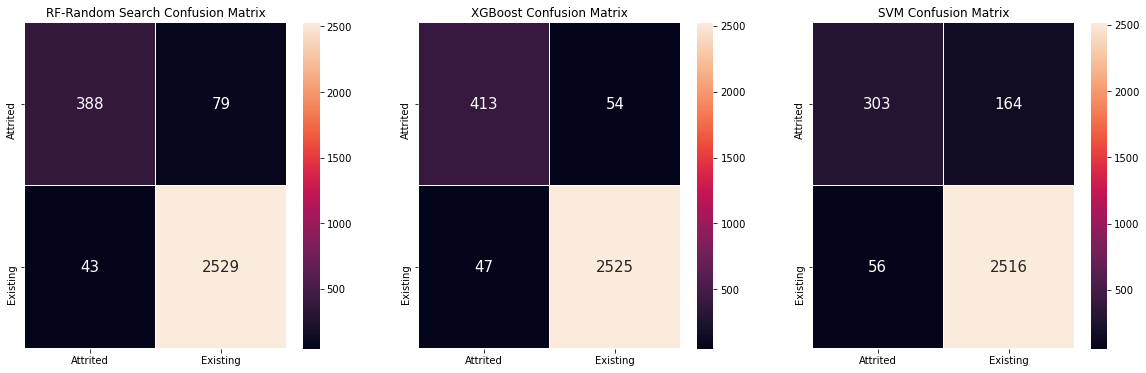

In [36]:
fig,ax=plt.subplots(ncols=3, figsize=(20,6))

con_mat_rfc = confusion_matrix(y_true, y_rfc)
labels = ["Attrited","Existing"]
sns.heatmap(con_mat_rfc,annot=True,xticklabels=labels, 
            yticklabels=labels, fmt='d', annot_kws={"size": 15},linewidths=.5,ax=ax[0])
ax[0].title.set_text('RF-Random Search Confusion Matrix')

con_mat_xgb = confusion_matrix(y_true, y_xgb)
labels = ["Attrited","Existing"]
sns.heatmap(con_mat_xgb,annot=True,xticklabels=labels, 
            yticklabels=labels, fmt='d', annot_kws={"size": 15},linewidths=.5,ax=ax[1])
ax[1].title.set_text('XGBoost Confusion Matrix')

con_mat_svm = confusion_matrix(y_true, y_svm)
labels = ["Attrited","Existing"]
sns.heatmap(con_mat_svm,annot=True,xticklabels=labels, 
            yticklabels=labels, fmt='d', annot_kws={"size": 15},linewidths=.5,ax=ax[2])
ax[2].title.set_text('SVM Confusion Matrix')

plt.show()

ML Feature Importance Visualizaion

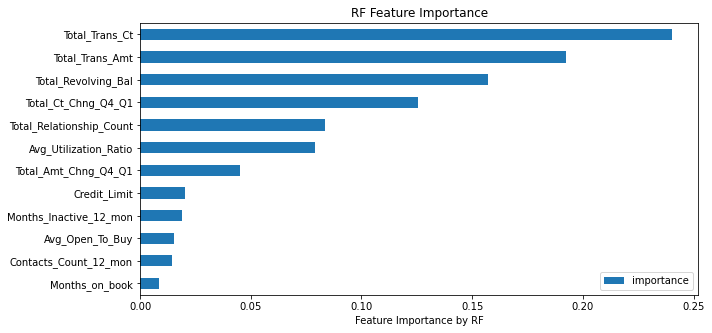

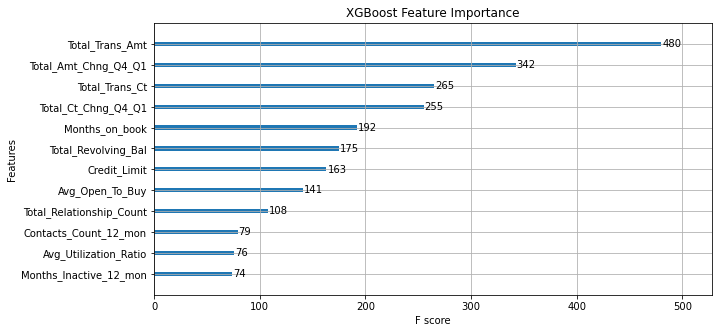

In [55]:
rf_features_f1 = randomized_model.best_estimator_.feature_importances_
rf_features = pd.DataFrame({'importance':rf_features_f1}, index=X.columns)
rf_features.sort_values(by = 'importance', ascending = True , axis =0).plot(kind='barh',figsize=(10,5))

plt.xlabel("Feature Importance by RF")
plt.title("RF Feature Importance")
plt.show()


fscore = xgb_model.get_booster().get_fscore()
plot_importance(booster=xgb_model)
plt.title("XGBoost Feature Importance")
plt.show()



Based on XGBoost result (higher than RF) , We can choose Top5 Features.

Total_Trans_Amt : Total Transaction Amount(Last 12 months)
Total_Amt_Chung_Q4_Q1 : Change of relationship with bank(Q4 over Q1)
Total_Trans_Ct : Total Transacion Count(Last 12 months)
Total_Ct_Chng_Q4_Q1 : Change in Transaction Count(Q4 over Q1)
Months_on_book : Period of relationship with bank


# Conclusion

- Bank needs to some Transaction Marketing for potantial attrition customer.
- As the number of Transaction decreases, The more likely it is that customers will churn. 
